In [ ]:
!pip install allensdk pandas==0.25.1

In [39]:
import warnings
from h5py.h5py_warnings import H5pyDeprecationWarning
warnings.filterwarnings("ignore", category=H5pyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [40]:
from allensdk.core.cell_types_cache import CellTypesCache

# Instantiate the CellTypesCache instance.  The manifest_file argument
# tells it where to store the manifest, which is a JSON file that tracks
# file paths.  If you supply a relative path (like this), it will go
# into your current working directory
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

# this saves the NWB file to 'cell_types/specimen_464212183/ephys.nwb'
cell_specimen_id = 614726150
data_set = ctc.get_ephys_data(cell_specimen_id)

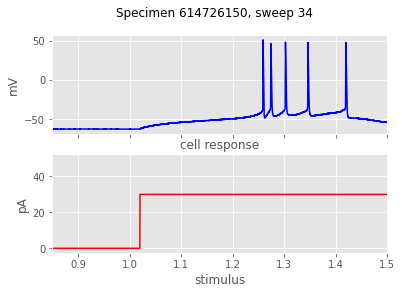

In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

sweep_number = 34
sweep_data = data_set.get_sweep(sweep_number)

index_range = sweep_data["index_range"]
i = sweep_data["stimulus"][0:index_range[1]+1] # in A
v = sweep_data["response"][0:index_range[1]+1] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)

#optionally to mark the spikes
#sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=9, end=14)
#sweep_ext.process_spikes()
#spike_times = sweep_ext.spike_feature("threshold_t")
#threshold_v = sweep_ext.spike_feature("threshold_v")

#plt.style.use('ggplot')
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, 'b-')
axes[1].plot(t, i, 'r')
axes[0].set_ylabel("mV")
axes[1].set_ylabel("pA")
axes[0].set_xlabel("cell response")
axes[1].set_xlabel("stimulus")
#axes[0].scatter(spike_times, threshold_v, s=40, c='firebrick', zorder=20)
plt.suptitle(f"Specimen {cell_specimen_id}, sweep {sweep_number}")
plt.xlim(0.85, 1.5)
plt.show()

Avg spike threshold: -35.5 mV
Avg spike width: 0.94 ms


(1.0, 1.08)

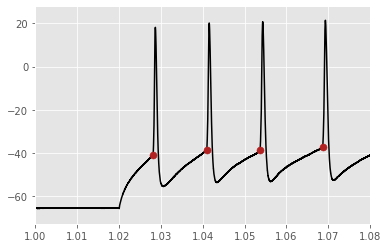

In [13]:
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(0, len(v)) * (1.0 / sampling_rate)


fig = plt.figure()
plt.plot(t, v, color='black')

# setting zorder puts the dots on top of the trace
plt.scatter(spike_times, threshold_v, s=50, c='firebrick', zorder=20)
plt.xlim(1.0, 1.08)